<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/Image_classifier_for_binary_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [3]:
import numpy as np

fetching data from G-drive

In [8]:
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset-20231115T161328Z-001/Image Classification CNN Keras Dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset-20231115T161328Z-001/Image Classification CNN Keras Dataset/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset-20231115T161328Z-001/Image Classification CNN Keras Dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset-20231115T161328Z-001/Image Classification CNN Keras Dataset/labels_test.csv', delimiter=',')


In [9]:
print("shape of X_train",X_train.shape)
print("shape of Y_train",Y_train.shape)
print("shape of X_test",X_test.shape)
print("shape of Y_test",Y_test.shape)


shape of X_train (2000, 30000)
shape of Y_train (2000,)
shape of X_test (400, 30000)
shape of Y_test (400,)


In [10]:
X_train=X_train.reshape(len(X_train),100,100,3) #image of 100*100*3 size,which simply means 100*100 sized 3d image
Y_train=Y_train.reshape(len(Y_train),1)#100*100 sized 1d image
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)


In [12]:
print('Shape of X_train',X_train.shape)#images
print('shape of Y_train',Y_train.shape)#labels
print('Shape of X_test',X_test.shape)
print('shape of Y_test',Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
shape of Y_test (400, 1)


Normalizing image's pixel intensity

In [13]:
X_train=X_train/255.0
X_test=X_test/255.0

In [14]:
import random
import matplotlib.pyplot as plt

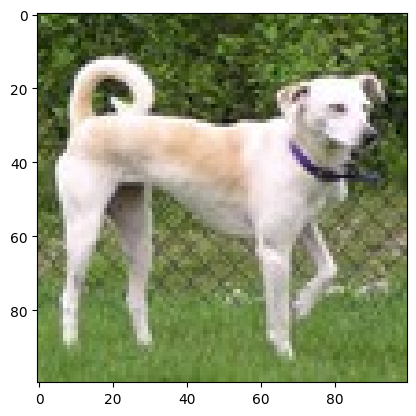

In [17]:
index=random.randint(0,len(X_train))
plt.imshow(X_train[index,:])  #considering random image from dataset
plt.show()

Classification Model

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])#way-1



In [22]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#way-2

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(X_train,Y_train,epochs=15,batch_size=64)

Epoch 1/15
32/32 [==============================] - 26s 806ms/step - loss: 0.3757 - accuracy: 0.8370
Epoch 2/15
32/32 [==============================] - 26s 786ms/step - loss: 0.3038 - accuracy: 0.8735
Epoch 3/15
32/32 [==============================] - 22s 705ms/step - loss: 0.2790 - accuracy: 0.8910
Epoch 4/15
32/32 [==============================] - 27s 838ms/step - loss: 0.2085 - accuracy: 0.9260
Epoch 5/15
32/32 [==============================] - 22s 692ms/step - loss: 0.1694 - accuracy: 0.9405
Epoch 6/15
32/32 [==============================] - 23s 709ms/step - loss: 0.1171 - accuracy: 0.9635
Epoch 7/15
32/32 [==============================] - 24s 750ms/step - loss: 0.0901 - accuracy: 0.9725
Epoch 8/15
32/32 [==============================] - 22s 699ms/step - loss: 0.0603 - accuracy: 0.9895
Epoch 9/15
32/32 [==============================] - 25s 785ms/step - loss: 0.0435 - accuracy: 0.9960
Epoch 10/15
32/32 [==============================] - 22s 694ms/step - loss: 0.0334 - accura

In [29]:
model.evaluate(X_test,Y_test)


13/13 [==============================] - 1s 95ms/step - loss: 1.4985 - accuracy: 0.6775


[1.498486042022705, 0.6775000095367432]

Making Predictions

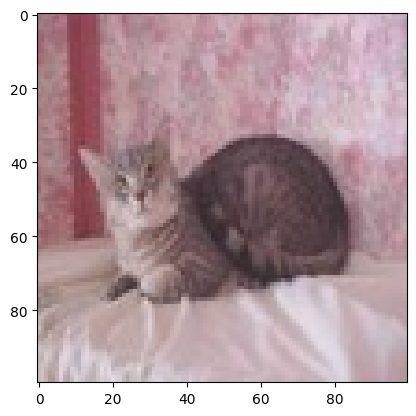

1/1 [==============================] - 0s 23ms/step
model says its a : cat


In [37]:
index=random.randint(0,len(Y_test))
plt.imshow(X_test[index,:])
plt.show()
y_pred=model.predict(X_test[index,:].reshape(1,100,100,3))
y_pred=y_pred>0.5
if y_pred==0:
  pred='dog'
else:
 pred='cat'
print('model says its a :',pred)

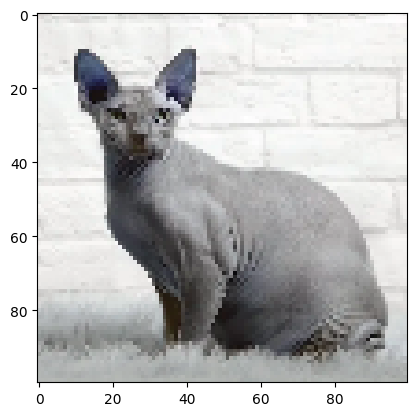

1/1 [==============================] - 0s 31ms/step
Model says it's a: cat


In [69]:
import cv2
# Load your own image
image_path = '/spninx.jpg'  # Replace with the path to your image
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))  # Resize the image to match the model's input shape
img = img / 255.0  # Normalize pixel values to be between 0 and 1

# Display the image
plt.imshow(img)
plt.show()

# Reshape the input for prediction
y_pred = model.predict(img.reshape(1, 100, 100, 3))
y_pred = y_pred >0.5

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'


print('Model says it\'s a:', pred)


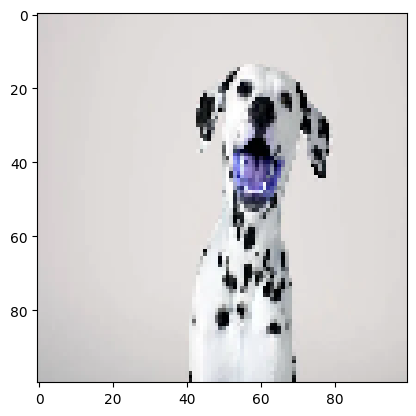

1/1 [==============================] - 0s 39ms/step
Model Output: [[0.00200091]]
Model says it's a: dog


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your own image
image_path = '/dal.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))
img = img / 255.0  # Normalize pixel values to be between 0 and 1


plt.imshow(img)
plt.show()

# Reshape the input for prediction
input_img = img.reshape(1, 100, 100, 3)

# Debugging predictions
y_pred = model.predict(input_img)
print('Model Output:', y_pred)

# Threshold predictions
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print('Model says it\'s a:', pred)


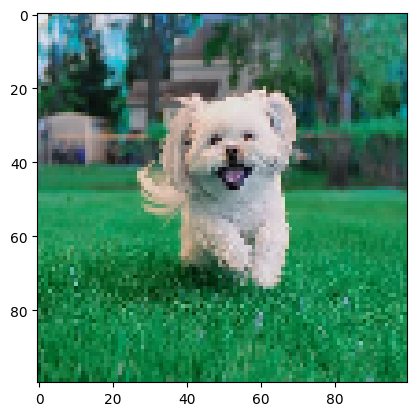

1/1 [==============================] - 0s 145ms/step
Model Output: [[0.]]
Model says it's a: dog


In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/s.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))

plt.imshow(img)
plt.show()


input_img = img.reshape(1, 100, 100, 3)

#  predictions
y_pred = model.predict(input_img)
print('Model Output:', y_pred)

# Thresholding
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print('Model says it\'s a:', pred)